<a href="https://colab.research.google.com/github/FERNANDOBUCHELLY/TAM2025-2/blob/main/Copia_de_Introduction_Recurrent_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Procesamiento de secuencias con redes neuronales recurrentes

- En general, muchos problemas en ciencia de datos, requieren del procesado de datos sencuenciales, generalmente asociados al tiempo (series de tiempo).

- En ese sentido, sea la serie de datos $\{x_t\in\mathbb{R}\}_{t=1}^T$.

- Suponga que se define el modelo predictivo probabilístico de la forma:

$$x_t \sim P(x_t|x_{t-1},\dots,x_1)$$

- En general, el estudio de datos secuenciales se puede atacar desde dos aproximaciones básicas: i) modelos autorregresivos , y ii) modelos autorregresivos de variable latente.

# Modelos autorregresivos

- Dichos modelos fijan una dependencia temporal de orden $\tau$.

- Por ende, el número de puntos requeridos para realizar predicciones para $t > \tau$ se mantiene fijo, dado que se asume:

$$x_t \sim P(x_t|x_{t-1},\dots,x_{t-\tau})$$

# Modelos autorregresivos de variable latente

- Buscan preservar alguna representación latente (memoría) $h_t$ de las observaciones pasadas, y busca actualizar (predecir) la secuencia $x_t$ y la variable latente $h_t$, de la forma:

$$\hat{x}_t = P(x_t|h_t)$$

$$h_t = g(h_{t-1},x_{t-1})$$

![autorregresivo](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/autorregresivo.png?raw=1)

**Nota**: $h_t$ no es observable (latente), por ende debe estimarse desde los datos.

- En estadística, el concepto de dinámica que no cambia (patrón regular) se conoce como estacionario. En este sentido, podemos tener un estimado de la secuencia completa utilizando un modelo probabilístico de la forma:

$$P(x_1,x_2,\dots,x_T) = \prod^T_{t=1}P(x_t|x_{t-1},\dots,x_1)$$
donde el estimado de la probabilidad condicional se puede realizar mediante regresores o clasficadores para eventos continuos o discretos, respectivamente.



# Modelos Markovianos

- En los modelos autorregresivos la estimación de $x_t$ se basa en una ventana de tamaño $\tau$, de la forma $x_{t-1},\dots,x_{t-\tau}$.

- Para cuando dicha aproximación es correcta, se dice que la secuencia de datos cumple con la condición Markoviana.

- Para $\tau=1$, se tiene un modelo de Markov de primer orden:

$$P(x_1,x_2,\dots,x_T)=\prod_{t=1}^T P(x_t|x_{t-1})$$
con $P(x_1|x_0)=P(x_1).$





# Ejercicio 1:

- Consultar el modelo y principio de optimización de los modelos de media móvil ([Moving average - MA](https://en.wikipedia.org/wiki/Moving-average_model)), autorregresivos de media móvil ([Autorregresive moving average - ARMA](https://en.wikipedia.org/wiki/Autoregressive%E2%80%93moving-average_model)) y autorregresivo integrado de media móvil ([Autoregressive integrated moving average](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average)). Cuáles son sus relaciones con los modelos Markovianos?.

#  Consulta: Modelos MA, ARMA, ARIMA y su relación con los modelos Markovianos

---

##  Introducción general

En el análisis de series temporales, los modelos estadísticos clásicos buscan **representar la dependencia temporal** entre observaciones sucesivas de una variable.  
Tres de los modelos más importantes son:

- **MA (Moving Average)**
- **ARMA (Autoregressive Moving Average)**
- **ARIMA (Autoregressive Integrated Moving Average)**

Estos modelos se basan en la idea de que el valor presente de una serie puede explicarse por una combinación de:
- Valores pasados de la misma serie (*autorregresión*), y  
- Errores aleatorios o “choques” pasados (*media móvil*).

---

##  Modelo de Media Móvil (MA)

El modelo **MA(q)** expresa el valor actual de la serie \( y_t \) como una **combinación lineal de errores aleatorios pasados** (ruido blanco):

\[
y_t = \mu + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \theta_2 \varepsilon_{t-2} + \dots + \theta_q \varepsilon_{t-q}
\]

donde:
- \( \varepsilon_t \) son errores aleatorios independientes e idénticamente distribuidos (i.i.d.).
- \( \theta_i \) son los coeficientes de la media móvil.

**Idea clave:**  
El modelo no depende directamente de valores pasados de \( y_t \), sino de los **errores pasados** que afectaron la serie.

---

##  Modelo Autorregresivo de Media Móvil (ARMA)

El modelo **ARMA(p, q)** combina la naturaleza **autorregresiva (AR)** y **de media móvil (MA)** en una misma ecuación:

\[
y_t = \phi_1 y_{t-1} + \phi_2 y_{t-2} + \dots + \phi_p y_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q}
\]

donde:
- La parte **AR(p)** captura la dependencia entre valores pasados de la serie.
- La parte **MA(q)** captura los efectos de choques o errores pasados.

**Interpretación:**  
El modelo ARMA representa series **estacionarias**, donde la media y la varianza son constantes en el tiempo.

---

##  Modelo Autorregresivo Integrado de Media Móvil (ARIMA)

Cuando una serie **no es estacionaria**, se introduce el operador de diferenciación para eliminar tendencias o componentes no estacionarios.  
El modelo **ARIMA(p, d, q)** se define como:

\[
\nabla^d y_t = \phi_1 \nabla^d y_{t-1} + \dots + \phi_p \nabla^d y_{t-p} + \varepsilon_t + \theta_1 \varepsilon_{t-1} + \dots + \theta_q \varepsilon_{t-q}
\]

donde:
- \( d \) es el número de diferencias necesarias para hacer estacionaria la serie.
- \( \nabla^d \) denota la operación de diferenciación \( (y_t - y_{t-1}) \) repetida \( d \) veces.

**Ejemplo:**
- Si la serie tiene una tendencia lineal, aplicar una diferencia la hace estacionaria.
- Si aún no lo es, puede necesitar más diferencias (d > 1).

---

##  Principio de optimización de estos modelos

La estimación de los parámetros \(\phi_i\) y \(\theta_j\) se realiza mediante **minimización del error cuadrático medio (MSE)** o, en equivalencia estadística, **maximización de la verosimilitud (MLE – Maximum Likelihood Estimation)**.  

El procedimiento consiste en:
1. Asumir que los errores \(\varepsilon_t\) siguen una distribución normal.
2. Calcular los parámetros que **maximizan la probabilidad de observar los datos reales** dados los parámetros del modelo.
3. Validar el ajuste mediante criterios como AIC (Akaike Information Criterion) o BIC (Bayesian Information Criterion).

---

##  Relación con los Modelos Markovianos

Un **proceso de Markov** se caracteriza porque el **estado actual contiene toda la información relevante del pasado** para predecir el futuro.  
En otras palabras:

\[
P(y_{t+1} | y_t, y_{t-1}, \dots) = P(y_{t+1} | y_t)
\]

**Relación con los modelos AR, MA, ARMA y ARIMA:**
- Los modelos **AR(p)** son equivalentes a **procesos de Markov de orden p**, porque el valor futuro depende únicamente de los últimos *p* valores de la serie.  
- Los modelos **MA(q)** pueden verse como procesos de Markov en el espacio de los errores, ya que dependen de *q* perturbaciones pasadas.
- Los modelos **ARMA(p,q)** y **ARIMA(p,d,q)** combinan ambos tipos de memoria, extendiendo el principio markoviano a un espacio de estados ampliado (valores pasados + errores pasados).

**Conclusión:**  
Los modelos AR, MA, ARMA y ARIMA pueden considerarse **aproximaciones lineales de procesos de Markov**, donde el “estado” incluye un número finito de observaciones y/o errores pasados.  
Este concepto es el puente teórico entre los **modelos estadísticos clásicos** y los **modelos neuronales recurrentes (RNN)**, que también son sistemas **Markovianos no lineales**, capaces de aprender dependencias más complejas en el tiempo.

---

 **En resumen:**
- MA: depende de errores pasados.  
- ARMA: combina valores y errores pasados.  
- ARIMA: añade diferenciación para manejar no estacionariedad.  
- Todos ellos se basan en un **principio Markoviano**: el futuro depende solo de un conjunto finito de estados pasados, no de todo el historial.


# Redes neuronales recurrentes - Recurrent neural networks (RNN)

- Hasta el momento hemos trabajado con datos estructurados tipo tabla, en donde las muestras se asumen independientes e identicamente distribuidas (i.i.d.).

- Sin embargo, para datos secuenciales, la suposición i.i.d no es apropiada, y se requiren de arquitecturas que codifiquen dicha secuencialidad.

- Por ejemplo, en el caso de datos tipo imagen, la relación espacial debe ser codificada apropiadamente, como en el caso de las arquitecturas convolucionales ([Convolutional Neural Networks](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/3_Introduccion_CNN.ipynb)).

- En este sentido, las RNN pretenden explotar la codificación mediante variables latentes, para aproximar el modelado de la incertidumbre de la secuencia como:


$$P(x_t|x_{t-1},\dots,x_1)\approx P(x_t|h_{t-1})$$

donde el estado oculto $h_{t-1}$ (hidden state) codifica la información relevante de la secuencia hasta $t-1$.

- Además, el estado oculto en $t$ se puede calcular a partir de $x_t$ y $h_{t-1},$ como:

$$h_t=f(x_t,h_{t-1})$$

**Nota**: se podría utilizar como $h_t$ todo el vector de datos $x_t,x_{t-1},\dots,x_1$; no obstante, el costo computacional y de memoría sería muy alto.

## Las RNN son redes neuronales con estados ocultos!

- Considere una matriz (mini-lote) de $P$ características desde datos secuenciales $\mathbf{X}_t\in\mathbb{R}^{N\times P}$, es decir, tenemos $N$ trayectorias con $P$ mediciones de una secuencia en el instante $t$.

- Sea $\mathbf{H}_t\in\mathbb{R}^{N \times h}$ la variable oculta (latente) para el instante $t$, la estimación de dicha variable respecto a la entrada actual y a la variable oculta en $t-1$ se puede modelar mediante RNN como:

$$\mathbf{H}_t = \phi(\mathbf{X}_t \mathbf{W}+\mathbf{H}_{t-1}\mathbf{S} + \mathbf{b}),$$

donde $\mathbf{W}\in\mathbb{R}^{P \times h},$ $\mathbf{S}\in\mathbb{R}^{h \times h},$ $\mathbf{b}\in\mathbb{R}^{h}$ y $\phi(\cdot)$ es una función de activación no lineal.

- Si se desea calcular la salida $\mathbf{O}_t\in\mathbb{R}^{N\times Q}$, se puede utilizar la información del estado oculto de la forma:

$$\mathbf{O}_t = \mathbf{H}_t\mathbf{A}+\mathbf{c},$$
donde $\mathbf{A}\in\mathbb{R}^{h\times Q}$, $\mathbf{c}\in\mathbb{R}^{Q}.$

**Esquema de una RNN con un estado oculto:**

![rnn](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/rnn.png?raw=1)



- A continuación se presenta algunos ejemplos sobre Tensorflow para RNN.

In [2]:
import sys
import sklearn
import tensorflow as tf
from tensorflow import keras
import numpy as np
import os
#-------------------------------------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
#
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)
#-------------------------------------------------------------------------------

Generamos el conjunto de series de tiempo a analizar

In [3]:
#-------------------------------------------------------------------------------
# definimos función para generar señales 1D-------------------------------------
def generate_time_series(batch_size, n_steps):
    freq1, freq2, offsets1, offsets2 = np.random.rand(4, batch_size, 1)
    time   = np.linspace(0, 1, n_steps)
    series = 0.5 * np.sin((time - offsets1) * (freq1 * 10 + 10))  #   wave 1
    series += 0.2 * np.sin((time - offsets2) * (freq2 * 20 + 20)) # + wave 2
    series += 0.1 * (np.random.rand(batch_size, n_steps) - 0.5)   # + noise
    return series[..., np.newaxis].astype(np.float32)
#-------------------------------------------------------------------------------

In [4]:
#-------------------------------------------------------------------------------
# definimos número de steps y batch_size----------------------------------------
n_steps    = 50
batch_size = 10000
#-------------------------------------------------------------------------------
series           = generate_time_series(batch_size, n_steps + 1)
print('Series dimension:',series.shape)
#-------------------------------------------------------------------------------
# partimos en conjuntos de train/valid/test-------------------------------------
X_train, y_train = series[:7000, :n_steps], series[:7000, -1]
X_valid, y_valid = series[7000:9000, :n_steps], series[7000:9000, -1]
X_test, y_test = series[9000:, :n_steps], series[9000:, -1]
#-------------------------------------------------------------------------------
print('Train dimensions:',X_train.shape, y_train.shape)
print('Valid dimensions:',X_valid.shape, y_valid.shape)
print('Test dimensions:',X_test.shape, y_test.shape)
#-------------------------------------------------------------------------------

Series dimension: (10000, 51, 1)
Train dimensions: (7000, 50, 1) (7000, 1)
Valid dimensions: (2000, 50, 1) (2000, 1)
Test dimensions: (1000, 50, 1) (1000, 1)


$[y_{t+P},\dots,y_{t}] = f(y_{t-1},\dots,y_{t-\tau},x_{t},x_{t-1},\dots,x_{t-\tau})$

In [5]:
#-------------------------------------------------------------------------------
y_train # vector de salida
#-------------------------------------------------------------------------------

array([[-0.35489398],
       [ 0.11629631],
       [-0.35395944],
       ...,
       [ 0.04946356],
       [-0.26231018],
       [ 0.60062087]], dtype=float32)

Generamos la gráfica de las series de tiempo creadas

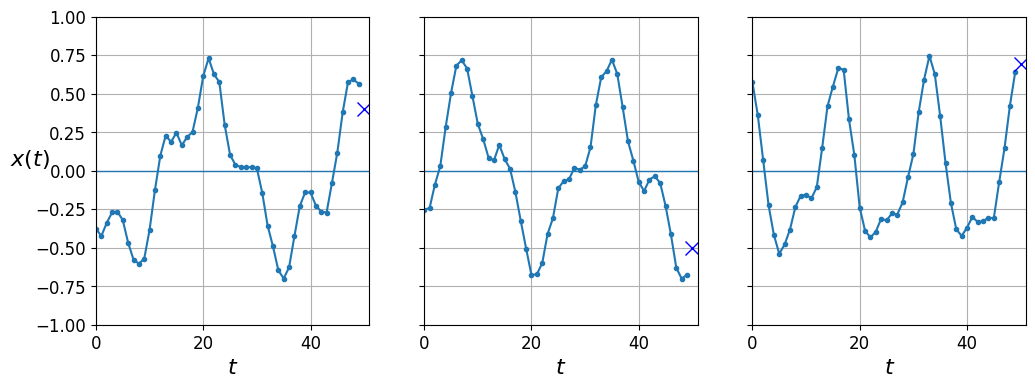

In [6]:
#-------------------------------------------------------------------------------
# definimos función para graficar las series------------------------------------
def plot_series(series, y=None, y_pred=None, x_label="$t$", y_label="$x(t)$"):
    plt.plot(series, ".-")
    if y is not None:
        plt.plot(n_steps, y, "bx", markersize=10)
    if y_pred is not None:
        plt.plot(n_steps, y_pred, "ro")
    plt.grid(True)
    if x_label:
        plt.xlabel(x_label, fontsize=16)
    if y_label:
        plt.ylabel(y_label, fontsize=16, rotation=0)
    plt.hlines(0, 0, 100, linewidth=1)
    plt.axis([0, n_steps + 1, -1, 1])
#-------------------------------------------------------------------------------
# graficamos 3 series del set validation----------------------------------------
fig, axes = plt.subplots(nrows=1, ncols=3, sharey=True, figsize=(12, 4))
for col in range(3):
    plt.sca(axes[col])
    plot_series(X_valid[col, :, 0], y_valid[col, 0],
                y_label=("$x(t)$" if col==0 else None))
plt.show()
#-------------------------------------------------------------------------------

# Predicción ingenua (solo predecir el último valor):

- Para ilustrar el concepto de secuencialidad, utilizaremos un predictor ingenuo, en donde la salida actual sería igual al valor en el instante anterior:

$$x_t = x_{t-1}$$

In [7]:
#-------------------------------------------------------------------------------
# asumimos que el valor ha estimar es el último elemento de la serie----------------
y_pred = X_test[:, -1]
#-------------------------------------------------------------------------------
# calculamos el MSE entre el y_valid vs. y_pred---------------------------------

print('MSE:',np.mean(keras.losses.mse(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

MSE: 2.1811275 %


- El error cálculado no es tan grande aparentemente.

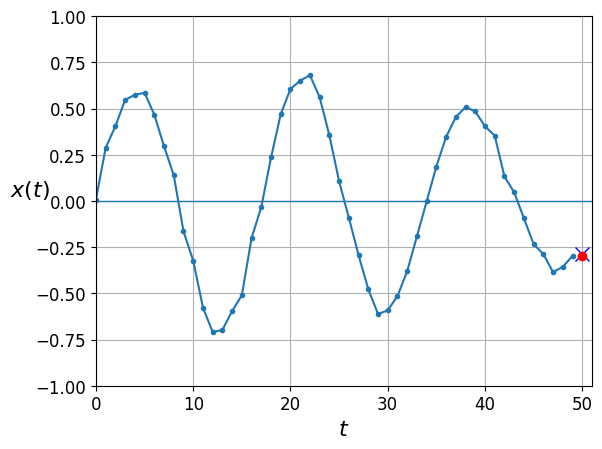

In [8]:
#-------------------------------------------------------------------------------
# graficamos valor estimado----------------------------------------------------
plot_series(X_test[2, :, 0], y_test[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

# Predicción lineal

- Ahora utilizaremos un modelo lineal simple.

- Recuerde que como generamos ventanas, podrimos entender esta aproximación como un modelo autorregresivo simple (sin variables latentes):

$$x_t \sim P(x_t|x_{t-1},\dots,x_{t-\tau})$$

donde la estimación de la condicional se realiza mediante un regresor con capas densas.



$\mathbf{X}=[\mathbf{x}_n]\in \mathbb{R}^{N \times P}$

$\mathbf{x}_n =[y_{n-1},y_{n-2},\dots, y_{n-\tau}]$

$\mathbf{y}\in \mathbb{R}^T$

$f(\mathbf{x}_n)=\mathbf{x}_n\mathbf{w}=x_{n1}w_1+\dots+x_{nP}w_P$

$f(\mathbf{x}_n)= y_{n-1}w_1+\dots+y_{n-\tau}w_P = \hat{y}_n$

$P = \tau$

/usr/local/lib/python3.12/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 50)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 51 (204.00 B)

 Trainable params: 51 (204.00 B)

 Non-trainable params: 0 (0.00 B)

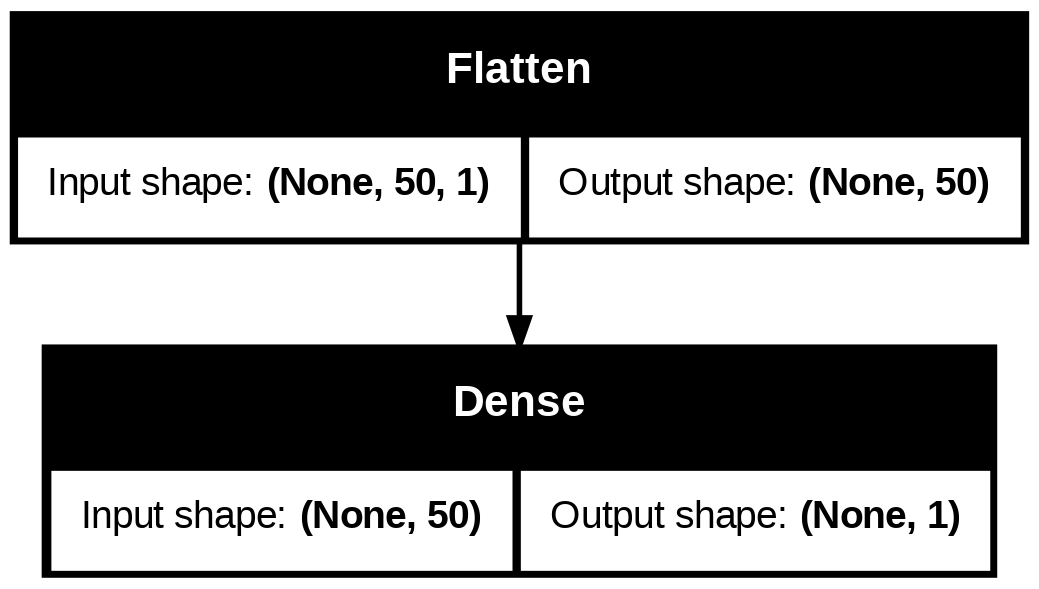

In [9]:
#-------------------------------------------------------------------------------
# definimos un modelo secuencial------------------------------------------------
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[50, 1]),
    keras.layers.Dense(1)
])
#-------------------------------------------------------------------------------
model.summary()
#-------------------------------------------------------------------------------
keras.utils.plot_model(model, "my_model_series.png", show_shapes=True)
#-------------------------------------------------------------------------------

Compilamos y ajustamos el modelo usando los datos de train y validation

In [10]:
epochs = 20
#-------------------------------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0740 - val_loss: 0.0179
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0152 - val_loss: 0.0118
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0109 - val_loss: 0.0096
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0091 - val_loss: 0.0082
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0078 - val_loss: 0.0071
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0068 - val_loss: 0.0062
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0060 - val_loss: 0.0055
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0054 - val_loss: 0.0050
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0050 - val_loss: 0.0046
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0047 - val_loss: 0.0043
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.0045 - val_loss: 0.0042
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step

In [11]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
print('MSE:',np.mean(keras.losses.mse(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step
MSE: 0.36411753 %


El resultado es mucho mejor que el predictor ingenuo.

Graficamos el desempeño del modelo secuencial

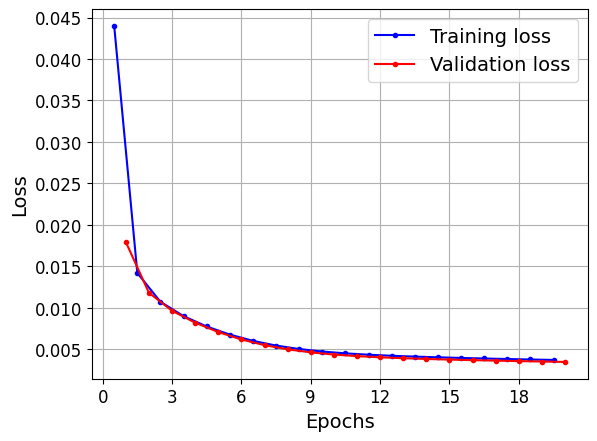

In [12]:
#-------------------------------------------------------------------------------
# definimos una función para plot de curvas de aprendizaje----------------------
def plot_learning_curves(loss, val_loss):
    plt.plot(np.arange(len(loss)) + 0.5, loss, "b.-", label="Training loss")
    plt.plot(np.arange(len(val_loss)) + 1, val_loss, "r.-", label="Validation loss")
    plt.gca().xaxis.set_major_locator(mpl.ticker.MaxNLocator(integer=True))
    #plt.axis([1, 20, 0, 0.05])
    plt.legend(fontsize=14)
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.grid(True)
#-------------------------------------------------------------------------------
# llamamos función de plot------------------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

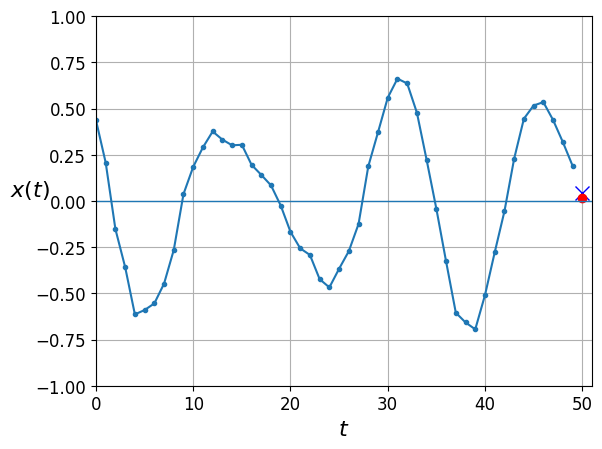

In [13]:
#-------------------------------------------------------------------------------
# pintamos series y predicciones------------------------------------------------
plot_series(X_test[0, :, 0], y_test[0, 0], y_pred[0, 0])
plt.show()
#-------------------------------------------------------------------------------

# Predicciones con RNN

- Keras tiene implementado las [capas simples de RNN](https://keras.io/api/layers/recurrent_layers/simple_rnn/).

- Por defecto la activación no lineal utilizada es la `tanh`, aunque se puede trabajar con las vistas en módulos anteriores.

- En este caso se define una única capa RNN con una neurona, dado que tenemos una única salida a predecir.

In [14]:
#-------------------------------------------------------------------------------
# definimos modelo secuencial de RNN simple-------------------------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(1, input_shape=[None, 1], )
])
#-------------------------------------------------------------------------------
# compilamos el modelo RNN------------------------------------------------------
optimizer = keras.optimizers.Adam(learning_rate=0.005)
model.compile(loss="mse", optimizer=optimizer)
#-------------------------------------------------------------------------------
# entrenamos el modelo y lo ajustamos con los datos de valid--------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.1490 - val_loss: 0.0499
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0425 - val_loss: 0.0299
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0275 - val_loss: 0.0219
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0209 - val_loss: 0.0177
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0173 - val_loss: 0.0151
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0150 - val_loss: 0.0135
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step - loss: 0.0135 - val_loss: 0.0124
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0126 - val_loss: 0.0117
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step - loss: 0.0120 - val_loss: 0.0113
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0117 - val_loss: 0.0110
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - loss: 0.0115 - val_loss: 0.0110
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0

In [15]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
print('MSE:',np.mean(keras.losses.mse(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
MSE: 1.1341199 %


Graficamos el performance de la Simple RNN

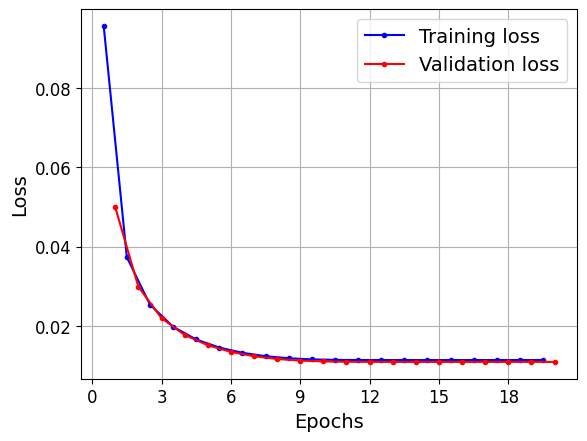

In [16]:
#-------------------------------------------------------------------------------
# graficamos curvas de aprendizaje----------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

Se analiza la predicción

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


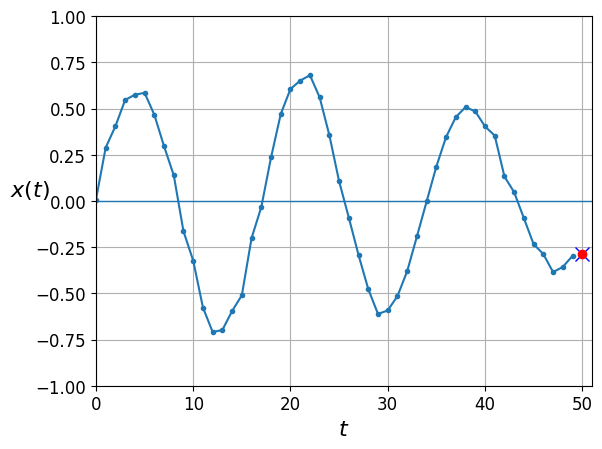

In [17]:
#-------------------------------------------------------------------------------
# evaluamos sobre set de X_valid------------------------------------------------
y_pred = model.predict(X_test)
# pintamos la serie y la predicción---------------------------------------------
plot_series(X_test[2, :, 0], y_test[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

# Deep RNNs

- Un modelo profundo de RNN contiene $L$ capas ocultas.

- Sobre cada capa oculta, el estado oculto es actualizado y se pasa al siguiente instante de tiempo de la capa actual y de la capa siguiente:

![deeprnn](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/deeprnn.png?raw=1)

- El modelo recurrente profundo se define entonces como:

$$\mathbf{H}^{(l)}_t = \phi_l\left(\mathbf{H}^{(l-1)}_t \mathbf{W}^{(l)}+\mathbf{H}^{(l)}_{t-1}\mathbf{S}^{(l)} + \mathbf{b}^{(l)}\right),$$

donde $\mathbf{W}^{(l)}\in\mathbb{R}^{h_{l-1} \times h_l},$ $\mathbf{S}^{(l)}\in\mathbb{R}^{h_{l-1} \times h_{l-1}},$ $\mathbf{b}\in\mathbb{R}^{h_l}$ y $\phi_l(\cdot)$ es una función de activación no lineal. $\mathbf{H}^{(0)}_t=\mathbf{X}_t$

- Si se desea calcular la salida $\mathbf{O}_t\in\mathbb{R}^{N\times Q}$, se puede utilizar la información del estado oculto en la capa oculta $L$:

$$\mathbf{O}_t = \mathbf{H}^{(L)}_t\mathbf{A}+\mathbf{c},$$
donde $\mathbf{A}\in\mathbb{R}^{h_L\times Q}$, $\mathbf{c}\in\mathbb{R}^{Q}.$


**Nota:** para aplicar la capa densa de la salida, se puede utilizar una capa `SimpleRNN(1)` con una neurona, o una capa densa aplicada desde la capa [TimeDistributed](https://keras.io/api/layers/recurrent_layers/time_distributed/) para preservar la temporalidad de los datos.

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_1 (SimpleRNN)        │ (None, None, 20)       │           440 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_2 (SimpleRNN)        │ (None, None, 20)       │           820 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn_3 (SimpleRNN)        │ (None, 1)              │            22 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,282 (5.01 KB)

 Trainable params: 1,282 (5.01 KB)

 Non-trainable params: 0 (0.00 B)

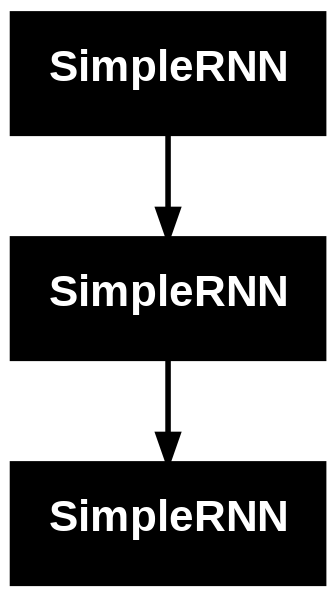

In [18]:
#-------------------------------------------------------------------------------
# definimos el modelo Deep RNN como un stack de SimpleRNN-----------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20, return_sequences=True),
    keras.layers.SimpleRNN(1,activation='linear')
    ])
#-------------------------------------------------------------------------------
# pintamos el diagrama de bloques del modelo
model.summary()
tf.keras.utils.plot_model(model)
#-------------------------------------------------------------------------------

# Ejercicio 2

- Para el modelo definido, determine los tamaños de las matrices y vectores de bias en cada capa.

**Nota**: Utilice el método `model.layers[l].get_weights()`

In [19]:
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
# entrenamos y ajustamos el modelo----------------------------------------------
history = model.fit(X_train, y_train, epochs=epochs,
                    validation_data=(X_valid, y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 9s 21ms/step - loss: 0.7352 - val_loss: 0.0506
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0439 - val_loss: 0.0324
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0253 - val_loss: 0.0180
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0146 - val_loss: 0.0115
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0099 - val_loss: 0.0090
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0077 - val_loss: 0.0069
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0066 - val_loss: 0.0059
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0059 - val_loss: 0.0054
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 11ms/step - loss: 0.0054 - val_loss: 0.0051
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0051 - val_loss: 0.0050
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0050 - val_loss: 0.0050
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 

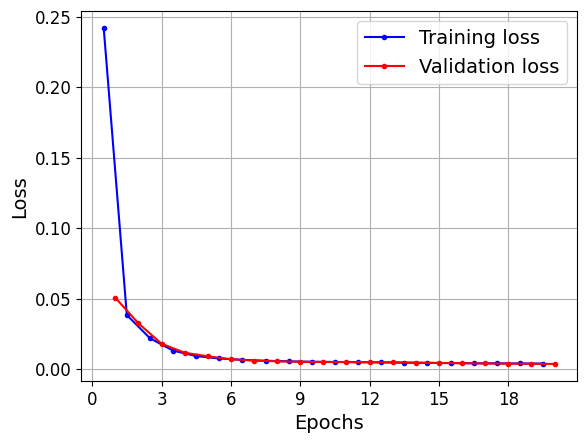

In [20]:
#-------------------------------------------------------------------------------
# graficamos curvas de aprendizaje----------------------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

In [21]:
y_train.shape

(7000, 1)

In [22]:
#-------------------------------------------------------------------------------
# verificamos evluación del modelo---------------------------------------------
y_pred = model.predict(X_test)
#print('MSE:',np.mean(keras.losses.mean_squared_error(y_test, y_pred))*100,'%')
#-------------------------------------------------------------------------------
y_pred.shape

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 23ms/step


(1000, 1)

Graficamos el performance de la Deep RNN

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step


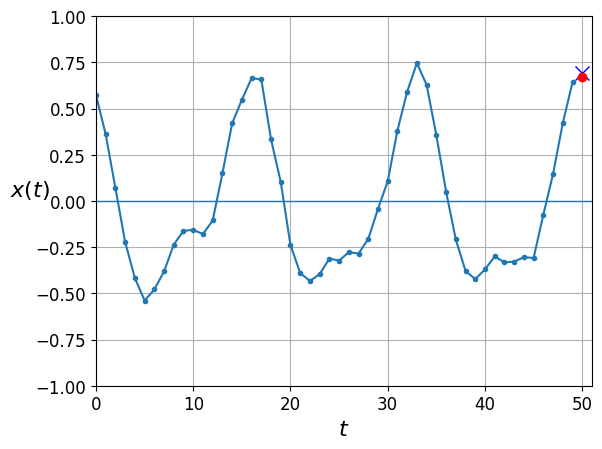

In [23]:
#-------------------------------------------------------------------------------
# evaluamos sobre set de X_valid------------------------------------------------
y_pred = model.predict(X_valid)
# pintamos la serie y la predicción---------------------------------------------
plot_series(X_valid[2, :, 0], y_valid[2, 0], y_pred[2, 0])
plt.show()
#-------------------------------------------------------------------------------

# Predicir un horizonte más lejano

- Si concatenamos las predicciones de a una muestra, para generar salidas con horizontes más lejanos, podemos estar propangando el error!

In [24]:
#-------------------------------------------------------------------------------
# definimos nueva semilla aleatoria---------------------------------------------
np.random.seed(43) #
#-------------------------------------------------------------------------------
# generamos nueva series de tiempo----------------------------------------------
series       = generate_time_series(1, n_steps + 10)     # horizonte de 10 valores en el tiempo
X_new, Y_new = series[:, :n_steps], series[:, n_steps:]
X            = X_new
for step_ahead in range(10):
    y_pred_one = model.predict(X[:, step_ahead:])[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
#-------------------------------------------------------------------------------
Y_pred = X[:, n_steps:]
#-------------------------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 364ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 31ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step


In [25]:
#-------------------------------------------------------------------------------
# observamos nuevas dimensiones de Y_pred---------------------------------------
Y_pred.shape #horizonte de 10 valores en el tiempo
#-------------------------------------------------------------------------------

(1, 10, 1)

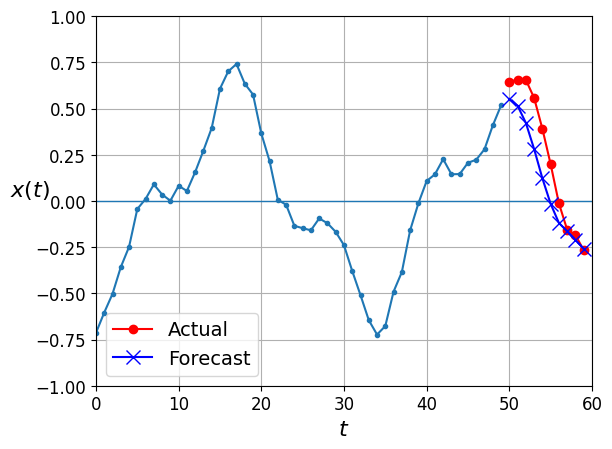

In [26]:
#-------------------------------------------------------------------------------
# definimos función para pintar forecast----------------------------------------
def plot_multiple_forecasts(X, Y, Y_pred):
    n_steps = X.shape[1]
    ahead = Y.shape[1]
    plot_series(X[0, :, 0])
    plt.plot(np.arange(n_steps, n_steps + ahead), Y[0, :, 0], "ro-", label="Actual")
    plt.plot(np.arange(n_steps, n_steps + ahead), Y_pred[0, :, 0], "bx-", label="Forecast", markersize=10)
    plt.axis([0, n_steps + ahead, -1, 1])
    plt.legend(fontsize=14)
#-------------------------------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

- Lo mejor es entrenar un modelo que incluya como salida target los siguientes $T$ valores a predicir en el horizonte.

- Se requiere entonces generar nuevamente la secuencia con $T-1$ pasos más en el tiempo.

In [27]:
#-------------------------------------------------------------------------------
# definimos semilla aleatoria---------------------------------------------------
np.random.seed(42)
#-------------------------------------------------------------------------------
n_steps = 50
series = generate_time_series(10000, n_steps + 10)
print('Series dimension:',series.shape)
X_train, Y_train = series[:7000, :n_steps], series[:7000, -10:, 0]
X_valid, Y_valid = series[7000:9000, :n_steps], series[7000:9000, -10:, 0]
X_test, Y_test = series[9000:, :n_steps], series[9000:, -10:, 0]
#-------------------------------------------------------------------------------
print('Train dimensions:',X_train.shape, Y_train.shape)
print('Valid dimensions:',X_valid.shape, Y_valid.shape)
print('Test dimensions:',X_test.shape, Y_test.shape)
#-------------------------------------------------------------------------------

Series dimension: (10000, 60, 1)
Train dimensions: (7000, 50, 1) (7000, 10)
Valid dimensions: (2000, 50, 1) (2000, 10)
Test dimensions: (1000, 50, 1) (1000, 10)


Predicción de los siguientes 10 valores (uno a uno y concatenar):

In [28]:
#-------------------------------------------------------------------------------
# realizamos predicción usando modelo Deep RNN----------------------------------
del X
X = X_valid
for step_ahead in range(10):
    y_pred_one = model.predict(X)[:, np.newaxis, :]
    X = np.concatenate([X, y_pred_one], axis=1)
#-------------------------------------------------------------------------------
# obtenemos las predicciones de los siguientes 10 valores-----------------------
Y_pred = X[:, n_steps:, 0]
#-------------------------------------------------------------------------------
print('Y_pred dimensions:', Y_pred.shape)
#-------------------------------------------------------------------------------

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
63/63 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step
Y_pred dimensions: (2000, 10)


- Error de predicción con horizontes mayores a 1 concatenando salidas:

In [29]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_valid, Y_pred))*100,'%')
#-------------------------------------------------------------------------------

2.867585 %


Ahora se crea una RNN que permita predecir los siguientes 10 valores en una sola evaluación (predicción multi-salida):

In [30]:
#-------------------------------------------------------------------------------
# definimos semillas aleatorias-------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
# definimos el modelo secuencial multi-salida-----------------------------------
model = keras.models.Sequential([
    keras.layers.SimpleRNN(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.SimpleRNN(20),
    keras.layers.Dense(10) # capa densa para estimar los siguientes 10 valores
])
#-------------------------------------------------------------------------------
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam")
#-------------------------------------------------------------------------------
# entrenamos y ajustamos el modelo----------------------------------------------
history = model.fit(X_train, Y_train, epochs=epochs,
                    validation_data=(X_valid, Y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1240 - val_loss: 0.0249
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0233 - val_loss: 0.0169
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0166 - val_loss: 0.0141
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0129 - val_loss: 0.0111
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0109 - val_loss: 0.0101
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0101 - val_loss: 0.0094
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0097 - val_loss: 0.0088
Epoch 8/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0093 - val_loss: 0.0088
Epoch 9/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0090 - val_loss: 0.0091
Epoch 10/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step - loss: 0.0088 - val_loss: 0.0092
Epoch 11/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 0.0087 - val_loss: 0.0090
Epoch 12/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 2s 8ms/step - loss: 

In [31]:
#-------------------------------------------------------------------------------
# generamos nuevos datos, con nueva semilla aleatoria---------------------------
np.random.seed(43)
#-------------------------------------------------------------------------------
# generamos nueva serie de tiempo-----------------------------------------------
series       = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, -10:, :]
#-------------------------------------------------------------------------------
print('X_new dimensions:',X_new.shape)
print('Y_new dimensions:',Y_new.shape)
#-------------------------------------------------------------------------------
# hacemos predicción de los 10 últimos valores----------------------------------
Y_pred       = model.predict(X_new)[..., np.newaxis]
print('Y_pred dimensions:',Y_pred.shape)
#-------------------------------------------------------------------------------

X_new dimensions: (1, 50, 1)
Y_new dimensions: (1, 10, 1)
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 502ms/step
Y_pred dimensions: (1, 10, 1)


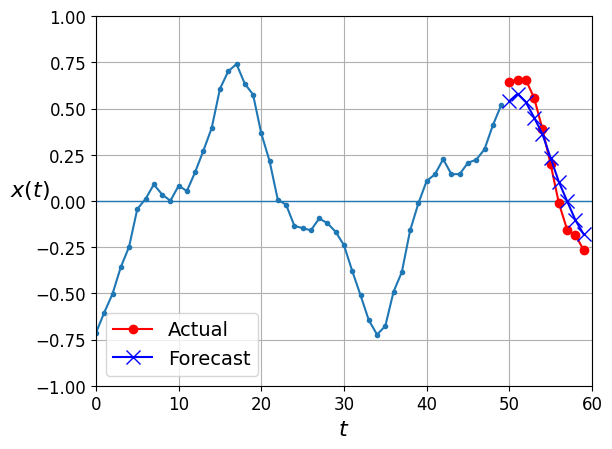

In [32]:
#-------------------------------------------------------------------------------
# graficamos el forecast--------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

- El error de predicción mejora:

In [33]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_new, Y_pred))*100,'%')

0.95650244 %


In [34]:
# ===============================================
# PARTE: Inspección de pesos y bias por capa
# ===============================================

for i, layer in enumerate(model.layers):
    print(f"\n🔹 Capa {i}: {layer.name}")
    weights = layer.get_weights()
    if not weights:
        print("  (sin pesos entrenables)")
        continue
    for j, w in enumerate(weights):
        print(f"  Peso {j} -> forma: {w.shape}")



🔹 Capa 0: simple_rnn_4
  Peso 0 -> forma: (1, 20)
  Peso 1 -> forma: (20, 20)
  Peso 2 -> forma: (20,)

🔹 Capa 1: simple_rnn_5
  Peso 0 -> forma: (20, 20)
  Peso 1 -> forma: (20, 20)
  Peso 2 -> forma: (20,)

🔹 Capa 2: dense_1
  Peso 0 -> forma: (20, 10)
  Peso 1 -> forma: (10,)


# El problema de las dependencias a largo plazo

- Uno de los atractivos de los RNN es la idea de conectar la información anterior a la tarea actual. Si los RNN pudieran hacer esto, serían extremadamente útiles.

- A veces, solo necesitamos mirar información reciente para realizar la tarea actual.

- Por ejemplo, considere un modelo de lenguaje que intenta predecir la siguiente palabra basándose en las anteriores. Si estamos tratando de predecir la última palabra en la oración:

 "las nubes están en el cielo",

no necesitamos ningún contexto adicional; es bastante obvio que la siguiente palabra será **cielo**.

- En tales casos, donde la brecha entre la información relevante y el lugar que se necesita es pequeña, los RNN pueden aprender a usar la información del pasado.

![rnn_corto](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/rnn_corto.png?raw=1)

- Pero también hay casos en los que necesitamos más contexto. Considere intentar predecir la última palabra del texto:

"Crecí en Francia ... hablo francés con fluidez",

la información reciente sugiere que la siguiente palabra es probablemente el **nombre de un idioma**, pero si queremos delimitar qué idioma, necesitamos el contexto de Francia, desde más atrás.

- Entonces, la brecha entre la información relevante y el punto donde se necesita puede ser grande.

![rnn_largo](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/rnn_largo.png?raw=1)

- En teoría, los RNN son capaces de manejar tales "dependencias a largo plazo". Lamentablemente, en la práctica, las RNN no parecen ser capaces de aprenderlos.

# [LSTM](https://colah.github.io/posts/2015-08-Understanding-LSTMs/): Long short term memory

- La LSTM pretende aprender dependencias largas.

- En general, en LSTM, y su extensión GRU, buscan crear mecanismos que permitan identificar cuando el estado oculto debe ser actualizado y cuando reseteado.

- A diferencia de una capa RNN simple, las LSTMs presenta cuatro (4) capas interactuando:


![lstm](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/lstm.png?raw=1)

con:

$$\mathbf{I}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xi}+\mathbf{H}_{t-1}\mathbf{W}_{hi}+\mathbf{b}_i\right)$$
$$\mathbf{F}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xf}+\mathbf{H}_{t-1}\mathbf{W}_{hf}+\mathbf{b}_f\right)$$
$$\mathbf{O}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xo}+\mathbf{H}_{t-1}\mathbf{W}_{ho}+\mathbf{b}_o\right)$$
$$\tilde{\mathbf{C}}_t = \tanh\left(\mathbf{X}_t\mathbf{W}_{xc}+\mathbf{H}_{t-1}\mathbf{W}_{hc}+\mathbf{b}_c\right)$$
$${\mathbf{C}}_t = \mathbf{F}_t \odot \mathbf{C}_{t-1} + \mathbf{I}_t \odot \tilde{\mathbf{C}}_t $$
$${\mathbf{H}}_t = \mathbf{O}_t \odot \tanh{(\mathbf{C}_{t})} $$


donde $\mathbf{W}_{xi},\mathbf{W}_{xf},\mathbf{W}_{xo}, \mathbf{W}_{xc}\in\mathbb{R}^{P\times h},$ $\mathbf{W}_{hi},\mathbf{W}_{hf},\mathbf{W}_{ho},\mathbf{W}_{hc}\in\mathbb{R}^{h\times h}$ y $\mathbf{b}_{i},\mathbf{b}_{f},\mathbf{b}_{o}, \mathbf{b}_{c}\in\mathbb{R}^{h}$.

- $\mathbf{I}_t$ busca codificar "cuanto" considerar de los datos nuevos y $\mathbf{F}_t$ que tando retenemos de los datos del pasado.

- Si la compuerta de salida se aproxima a 1, pasamos toda la información de la memoría al predictor, pero, si la compuerta de la salida aproxima a 0, se retiene la información en la celda de memoría.


In [35]:
#-------------------------------------------------------------------------------
# generamos los datos-----------------------------------------------------------
np.random.seed(42)
#-------------------------------------------------------------------------------
# generamos series de tiempo----------------------------------------------------
n_steps = 50
series  = generate_time_series(10000, n_steps + 10)
print('Series dimensions:',series.shape)
#-------------------------------------------------------------------------------
# partimos los datos en train/valid/test----------------------------------------
X_train = series[:7000, :n_steps]
X_valid = series[7000:9000, :n_steps]
X_test  = series[9000:, :n_steps]
print('X_train dimensions:',X_train.shape)
print('X_valid dimensions:',X_valid.shape)
print('X_test dimensions:',X_test.shape)
#-------------------------------------------------------------------------------
# definimos nuevos Y------------------------------------------------------------
Y = np.empty((10000, n_steps, 10))
for step_ahead in range(1, 10 + 1):
    Y[..., step_ahead - 1] = series[..., step_ahead:step_ahead + n_steps, 0]
print('Y dimensions:',Y.shape)
#-------------------------------------------------------------------------------
Y_train = Y[:7000]
Y_valid = Y[7000:9000]
Y_test  = Y[9000:]
#-------------------------------------------------------------------------------
print('Y_train dimensions:', Y_train.shape)
print('Y_valid dimensions:',Y_valid.shape)
print('Y_test dimensions:',Y_test.shape)
#-------------------------------------------------------------------------------

Series dimensions: (10000, 60, 1)
X_train dimensions: (7000, 50, 1)
X_valid dimensions: (2000, 50, 1)
X_test dimensions: (1000, 50, 1)
Y dimensions: (10000, 50, 10)
Y_train dimensions: (7000, 50, 10)
Y_valid dimensions: (2000, 50, 10)
Y_test dimensions: (1000, 50, 10)


**Nota**: En la capa de salida se puede utilizar una capa densa de 10 neuronas (horizonte de 10 valores). No obstante, debe aplicarse la capa [TimeDistributed](https://keras.io/api/layers/recurrent_layers/time_distributed/) para aplicar la operación densa sobre cada tramo de tiempo.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                     │ (None, None, 20)       │         1,760 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, None, 20)       │         3,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ time_distributed                │ (None, None, 10)       │           210 │
│ (TimeDistributed)               │                        │               │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 5,250 (20.51 KB)

 Trainable params: 5,250 (20.51 KB)

 Non-trainable params: 0 (0.00 B)

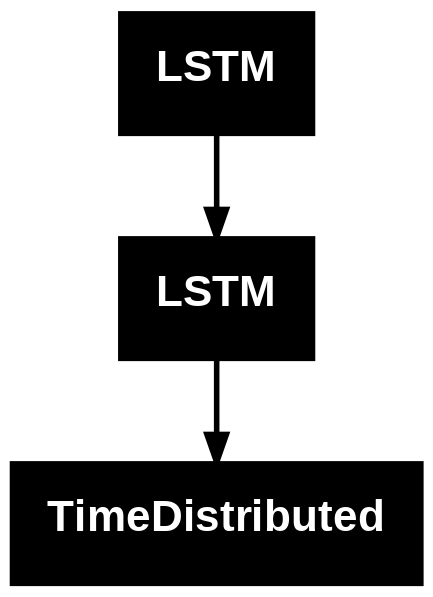

In [36]:
#-------------------------------------------------------------------------------
# definimos semilla aleatoria---------------------------------------------------
np.random.seed(42)
tf.random.set_seed(42)
#-------------------------------------------------------------------------------
def last_time_step_mse(Y_true, Y_pred):
    return keras.metrics.mse(Y_true[:, -1], Y_pred[:, -1])
#-------------------------------------------------------------------------------
# definimos el modelo secuencial con 2 capas LSTM-------------------------------
model = keras.models.Sequential([
    keras.layers.LSTM(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.LSTM(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.summary()
tf.keras.utils.plot_model(model)

In [37]:
#-------------------------------------------------------------------------------
# compilamos el modelo----------------------------------------------------------
model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
#-------------------------------------------------------------------------------
# entrenamos y validamos el modelo----------------------------------------------
history = model.fit(X_train, Y_train, epochs=epochs,
                    validation_data=(X_valid, Y_valid))
#-------------------------------------------------------------------------------

Epoch 1/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 8s 15ms/step - last_time_step_mse: 0.0922 - loss: 0.1022 - val_last_time_step_mse: 0.0340 - val_loss: 0.0547
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - last_time_step_mse: 0.0294 - loss: 0.0502 - val_last_time_step_mse: 0.0184 - val_loss: 0.0409
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0181 - loss: 0.0394 - val_last_time_step_mse: 0.0152 - val_loss: 0.0361
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - last_time_step_mse: 0.0150 - loss: 0.0351 - val_last_time_step_mse: 0.0137 - val_loss: 0.0332
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0133 - loss: 0.0324 - val_last_time_step_mse: 0.0124 - val_loss: 0.0311
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0123 - loss: 0.0306 - val_last_time_step_mse: 0.0113 - val_loss: 0.0296
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - last_time_step_mse: 0.0115 - loss: 0.0293 - val_las

In [38]:
#-------------------------------------------------------------------------------
# evaluamos el modelo sobre los datos de Valid----------------------------------
model.evaluate(X_test, Y_test)
#-------------------------------------------------------------------------------

32/32 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - last_time_step_mse: 0.0093 - loss: 0.0241


[0.024354103952646255, 0.009037138894200325]

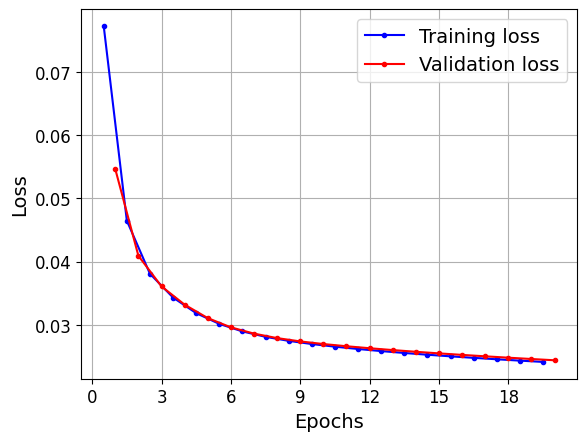

In [39]:
#-------------------------------------------------------------------------------
# observamos las curvas de aprendizaje del modelo-------------------------------
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()
#-------------------------------------------------------------------------------

In [40]:
#-------------------------------------------------------------------------------
# generamos una nueva serie de tiempo para testear el modelo--------------------
np.random.seed(43)
#-------------------------------------------------------------------------------
# generamos nueva sample--------------------------------------------------------
series       = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
#-------------------------------------------------------------------------------
# realizamos predicción---------------------------------------------------------
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]
#-------------------------------------------------------------------------------

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 460ms/step


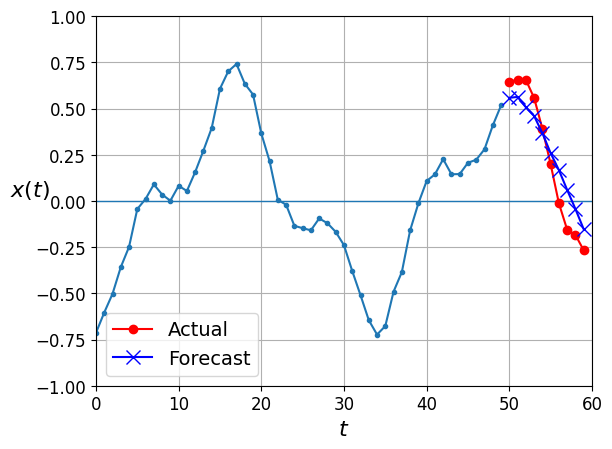

In [41]:
#-------------------------------------------------------------------------------
# graficamos el forecast--------------------------------------------------------
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()
#-------------------------------------------------------------------------------

- Rendimientos similares a las RNN con horizonte lejano.
- Es preciso sintonizar número de capas e hiperparámetros para aprovechar todas las ventajas de LSTM.

In [42]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_new, Y_pred))*100,'%')

1.6344163 %


# [GRU](https://towardsdatascience.com/understanding-gru-networks-2ef37df6c9be): Gated Recurrent Unit

- La GRU puede entenderse como una extensión de la capa LSTM para evitar problemas de convergencia en el gradiente.

$$\mathbf{R}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xr}+\mathbf{H}_{t-1}\mathbf{W}_{hr}+\mathbf{b}_r\right)$$
$$\mathbf{Z}_t = \sigma\left(\mathbf{X}_t\mathbf{W}_{xz}+\mathbf{H}_{t-1}\mathbf{W}_{hz}+\mathbf{b}_z\right)$$
$$\tilde{\mathbf{H}}_t = \tanh(\mathbf{X}_t\mathbf{W}_{xh}+(\mathbf{R}_t\odot\mathbf{H}_{t-1})\mathbf{W}_{hh}+\mathbf{b}_h)$$
$${\mathbf{H}}_t = \mathbf{Z}_t\odot\mathbf{H}_{t-1}+(1-\mathbf{Z}_t)\odot\tilde{\mathbf{H}}_t$$

donde $\mathbf{W}_{xh},\mathbf{W}_{xz},\mathbf{W}_{xh}\in\mathbb{R}^{P\times h},$ $\mathbf{W}_{hr},\mathbf{W}_{hz},\mathbf{W}_{hh}\in\mathbb{R}^{h\times h}$ y $\mathbf{b}_{r},\mathbf{b}_{z},\mathbf{b}_{h}\in\mathbb{R}^{h}$.

![gru](https://github.com/amalvarezme/AprendizajeMaquina/blob/main/5_DeepLearning/gru.png?raw=1)

- Si las entradas de $\mathbf{R}_t$ se acercan a 1, el modelo se convierte en una RNN simple. Para valores en $\mathbf{R}_t$ cercanos a 0, el estado oculto "candidato" se cácula como un MLP sobre $\mathbf{X}_t$, cualquier estado oculto anterior es "reseteado".

- Además, si los elementos de la compuerta de actualización $\mathbf{Z}_t$ son cercanos a 1, se mantiene el estado anterior en la capa, de lo contrario el nuevo estado $\mathbf{H}_t$ "acepta" el estado candidato $\tilde{\mathbf{H}}_t.$

- Lo anterior permite mitigar el efecto del desvanecimiento del gradiente de las RNN simples, codificando mejor dependencias en series con relaciones "relativamente grandes" en el tiempo.



In [43]:
np.random.seed(42)
tf.random.set_seed(42)

model = keras.models.Sequential([
    keras.layers.GRU(20, return_sequences=True, input_shape=[None, 1]),
    keras.layers.GRU(20, return_sequences=True),
    keras.layers.TimeDistributed(keras.layers.Dense(10))
])

model.compile(loss="mse", optimizer="adam", metrics=[last_time_step_mse])
history = model.fit(X_train, Y_train, epochs=epochs,
                    validation_data=(X_valid, Y_valid))

Epoch 1/20


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


219/219 ━━━━━━━━━━━━━━━━━━━━ 6s 14ms/step - last_time_step_mse: 0.0924 - loss: 0.0984 - val_last_time_step_mse: 0.0433 - val_loss: 0.0536
Epoch 2/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - last_time_step_mse: 0.0406 - loss: 0.0503 - val_last_time_step_mse: 0.0334 - val_loss: 0.0451
Epoch 3/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 5s 12ms/step - last_time_step_mse: 0.0341 - loss: 0.0444 - val_last_time_step_mse: 0.0290 - val_loss: 0.0408
Epoch 4/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0297 - loss: 0.0404 - val_last_time_step_mse: 0.0258 - val_loss: 0.0379
Epoch 5/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0263 - loss: 0.0373 - val_last_time_step_mse: 0.0214 - val_loss: 0.0348
Epoch 6/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - last_time_step_mse: 0.0209 - loss: 0.0336 - val_last_time_step_mse: 0.0169 - val_loss: 0.0320
Epoch 7/20
219/219 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - last_time_step_mse: 0.0161 - loss: 0.0310 - val_last_time_step

In [44]:
model.evaluate(X_valid, Y_valid)

63/63 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - last_time_step_mse: 0.0105 - loss: 0.0242


[0.024343717843294144, 0.01048885378986597]

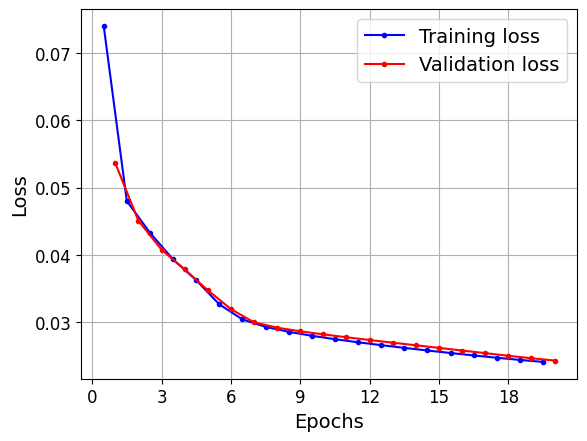

In [45]:
plot_learning_curves(history.history["loss"], history.history["val_loss"])
plt.show()

In [46]:
np.random.seed(43)

series = generate_time_series(1, 50 + 10)
X_new, Y_new = series[:, :50, :], series[:, 50:, :]
Y_pred = model.predict(X_new)[:, -1][..., np.newaxis]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 418ms/step


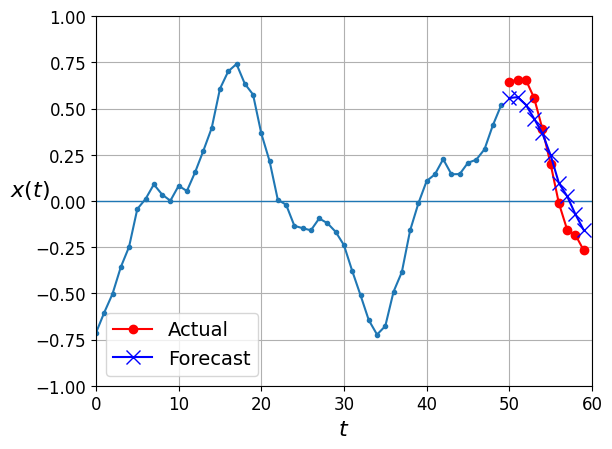

In [47]:
plot_multiple_forecasts(X_new, Y_new, Y_pred)
plt.show()

In [48]:
#-------------------------------------------------------------------------------
# calculamos el MSE de la predicción--------------------------------------------
print(np.mean(keras.metrics.mse(Y_new, Y_pred))*100,'%')

1.196699 %


# Ejercicio 3:

- Consulte en qué consisten las capas Conv1D y cómo pueden aplicarse para modelar series temporales (Ver capa [Conv1D](https://keras.io/api/layers/convolution_layers/convolution1d/) y [ejemplo](https://boostedml.com/2020/04/1-d-convolutional-neural-networks-for-time-series-basic-intuition.html)).

- Realice una comparación entre las redes tipo RNN simple, LSTM, GRU y Conv1D en terminos de la capacidad de predicción en términos del mse y el mae, en los datos simulados para diferentes horizontes: $\{1,2,3,\dots,15\}$

#  PARTE 1 — Consulta teórica: Capa Conv1D y su aplicación a series temporales

---

##  ¿En qué consisten las capas Conv1D y cómo se aplican a series temporales?

###  ¿Qué es una capa Conv1D?
La capa **Conv1D** (*convolución unidimensional*) se utiliza para procesar **datos secuenciales**, donde la información tiene una dimensión temporal o posicional, como en series de tiempo, audio o texto.  

En Keras se usa de la siguiente forma:

`layers.Conv1D(filters, kernel_size, activation, padding, input_shape)`

**Parámetros principales:**
- **filters:** número de filtros (o neuronas) que la capa aprenderá.  
- **kernel_size:** tamaño de la ventana temporal que examina cada filtro.  
- **padding:** define cómo se manejan los bordes de la secuencia.  
  - `'causal'` se usa en series temporales para **no mirar el futuro**.  
- **activation:** función de activación (por ejemplo `relu`, `tanh`).  
- **input_shape:** forma del dato de entrada, por ejemplo `(timesteps, features)`.

---

###  ¿Cómo funciona?
Cada filtro se desplaza sobre la secuencia detectando **patrones locales en el tiempo** (picos, tendencias o variaciones).  
Esto permite al modelo:
- Capturar dependencias **a corto o mediano plazo**.  
- Entrenar **más rápido que una RNN**, porque las convoluciones son paralelizables.  
- Reducir los problemas de gradiente que pueden afectar a las RNN clásicas.  

---

###  Aplicación a series temporales
Para usar Conv1D en predicción de series temporales (forecasting):

1. Se crean **ventanas deslizantes** con los últimos *n* valores para predecir el siguiente:  
   `X = [xₜ₋₂₉, …, xₜ₋₁],  y = xₜ`

2. Se construye un modelo CNN 1D, por ejemplo:  
   `Conv1D(32, kernel_size=3, activation='relu', padding='causal', input_shape=(window_size, 1))`  
   seguido de capas como `GlobalAveragePooling1D()` y `Dense(1)`.

3. El modelo aprende a predecir valores futuros a partir del historial reciente.

---

###  Comparación general entre modelos de secuencias

| Modelo | Característica principal | Ventaja | Desventaja |
|--------|--------------------------|----------|-------------|
| **RNN simple** | Procesa paso a paso la secuencia | Capta dependencias temporales | Entrenamiento lento, gradiente desaparece |
| **LSTM** | Usa “puertas” para recordar información a largo plazo | Captura relaciones largas | Más parámetros y costo alto |
| **GRU** | Variante simplificada del LSTM | Más rápida y eficiente | Menos control sobre la memoria |
| **Conv1D** | Aplica filtros sobre la dimensión temporal | Muy rápida, paralela y detecta patrones locales | Limitada para dependencias muy largas |

---

 **En resumen:**  
La capa **Conv1D** es ideal para modelar series temporales cuando los patrones relevantes están en **ventanas cortas o medianas**.  
Cuando las dependencias temporales son más largas, las arquitecturas **recurrentes** como **LSTM** o **GRU** suelen ofrecer mejores resultados.


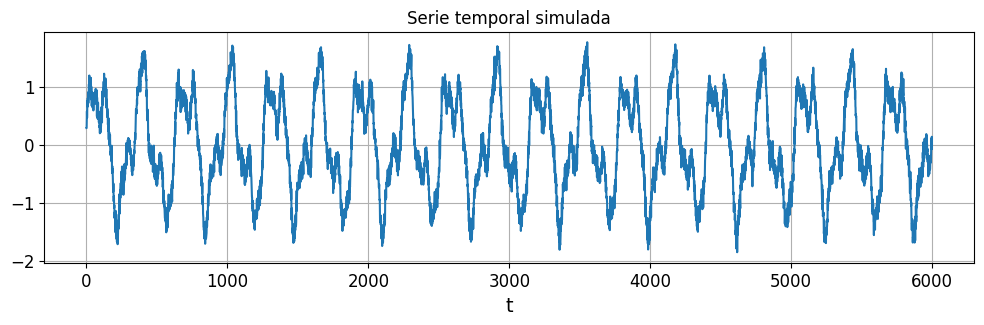

In [49]:
# ------------------------------
# PARTE B: Imports y simulación
# ------------------------------
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
import time
import os

# reproducibilidad (nota: en TF la reproducibilidad total puede requerir más pasos)
np.random.seed(42)
tf.random.set_seed(42)

# Simulación de una serie temporal (suma de senos + ruido)
T = 6000
t = np.arange(T)
series = np.sin(0.02 * t) + 0.5 * np.sin(0.05 * t + 0.5) + 0.2 * np.sin(0.11 * t) + 0.1 * np.random.randn(T)

plt.figure(figsize=(12,3))
plt.plot(series)
plt.title("Serie temporal simulada")
plt.xlabel("t")
plt.grid(True)
plt.show()

# Parámetros experimentales
window_size = 30          # tamaño de la ventana (n pasos previos)
horizons = list(range(1,16))  # 1..15
epochs = 25               # ajustar si desea más entrenamiento
batch_size = 64
patience = 5              # early stopping


In [50]:
# ------------------------------
# PARTE C: Preparar datasets (funciones)
# ------------------------------
def make_dataset(series, window_size, horizon):
    X, y = [], []
    for i in range(len(series) - window_size - horizon + 1):
        X.append(series[i : i + window_size])
        y.append(series[i + window_size + horizon - 1])
    X = np.array(X)
    y = np.array(y)
    X = X[..., np.newaxis]  # shape (n_samples, window_size, 1)
    return X, y

# Normalizamos usando solo el tramo de entrenamiento por índice (haremos split por índices abajo)
split_train = int(0.7 * T)
split_val = int(0.85 * T)

# Creamos scaler basado en la parte de train de la serie original
scaler = StandardScaler()
scaler.fit(series[:split_train].reshape(-1,1))

series_s = scaler.transform(series.reshape(-1,1)).flatten()

print("Series normalizada. Ejemplo valores (primeros 5):", series_s[:5])


Series normalizada. Ejemplo valores (primeros 5): [0.32326155 0.32336903 0.49721872 0.68053248 0.53792089]


In [51]:
# ------------------------------
# PARTE D: Builders de modelos
# ------------------------------
def build_rnn(window_size, units=32):
    model = models.Sequential([
        layers.SimpleRNN(units, input_shape=(window_size,1)),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_lstm(window_size, units=32):
    model = models.Sequential([
        layers.LSTM(units, input_shape=(window_size,1)),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_gru(window_size, units=32):
    model = models.Sequential([
        layers.GRU(units, input_shape=(window_size,1)),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

def build_conv1d(window_size, filters=32, kernel_size=3):
    model = models.Sequential([
        layers.Conv1D(filters, kernel_size=kernel_size, padding='causal',
                      activation='relu', input_shape=(window_size,1)),
        layers.GlobalAveragePooling1D(),
        layers.Dense(1)
    ])
    model.compile(optimizer='adam', loss='mse')
    return model

# Prueba rápida de creación
for fn in (build_rnn, build_lstm, build_gru, build_conv1d):
    m = fn(window_size)
    m.summary()
    print('---')
    break  # comentar para ver todos


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ simple_rnn_6 (SimpleRNN)        │ (None, 32)             │         1,088 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,121 (4.38 KB)

 Trainable params: 1,121 (4.38 KB)

 Non-trainable params: 0 (0.00 B)

---


In [52]:
# ------------------------------
# PARTE E: Entrenamiento por horizontes y recolección de métricas
# ------------------------------
results = []

# Para reducir impresiones excesivas
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

for h in horizons:
    print(f"\n--- HORIZON: {h} ---")
    X, y = make_dataset(series_s, window_size, h)
    n = len(X)
    # split por índices (misma lógica para todos los modelos)
    i_train_end = int(0.7 * n)
    i_val_end   = int(0.85 * n)

    X_train, y_train = X[:i_train_end], y[:i_train_end]
    X_val, y_val     = X[i_train_end:i_val_end], y[i_train_end:i_val_end]
    X_test, y_test   = X[i_val_end:], y[i_val_end:]

    print("Tamaños ->", X_train.shape, X_val.shape, X_test.shape)

    model_builders = {
        'RNN': build_rnn,
        'LSTM': build_lstm,
        'GRU': build_gru,
        'Conv1D': build_conv1d
    }

    for name, builder in model_builders.items():
        tf.keras.backend.clear_session()
        model = builder(window_size)
        # early stopping
        es = keras.callbacks.EarlyStopping(monitor='val_loss', patience=patience, restore_best_weights=True, verbose=0)
        t0 = time.time()
        history = model.fit(X_train, y_train,
                            validation_data=(X_val, y_val),
                            epochs=epochs, batch_size=batch_size,
                            callbacks=[es], verbose=0)
        dt = time.time() - t0

        y_pred = model.predict(X_test, batch_size=128)
        mse = mean_squared_error(y_test, y_pred)
        mae = mean_absolute_error(y_test, y_pred)

        print(f"{name:6s} | epochs={len(history.history['loss'])} | test_mse={mse:.6f} | test_mae={mae:.6f} | t={dt:.1f}s")

        results.append({
            'horizon': h,
            'model': name,
            'mse': mse,
            'mae': mae,
            'train_epochs': len(history.history['loss']),
            'train_time_s': dt
        })

# Convertir a DataFrame
df_res = pd.DataFrame(results)
df_res.head()



--- HORIZON: 1 ---
Tamaños -> (4179, 30, 1) (895, 30, 1) (896, 30, 1)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step  
RNN    | epochs=25 | test_mse=0.021568 | test_mae=0.118428 | t=17.8s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
LSTM   | epochs=25 | test_mse=0.021477 | test_mae=0.117298 | t=12.5s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step  
GRU    | epochs=25 | test_mse=0.021488 | test_mae=0.117819 | t=10.6s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step  
Conv1D | epochs=25 | test_mse=0.174605 | test_mae=0.341836 | t=8.6s

--- HORIZON: 2 ---
Tamaños -> (4178, 30, 1) (895, 30, 1) (896, 30, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
RNN    | epochs=25 | test_mse=0.023566 | test_mae=0.122883 | t=12.3s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
LSTM   | epochs=25 | test_mse=0.022246 | test_mae=0.118543 | t=11.4s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
GRU    | epochs=25 | test_mse=0.022953 | test_mae=0.120605 | t=11.5s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
Conv1D | epochs=25 | test_mse=0.188722 | test_mae=0.352281 | t=11.2s

--- HORIZON: 3 ---
Tamaños -> (4177, 30, 1) (895, 30, 1) (896, 30, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
RNN    | epochs=25 | test_mse=0.025694 | test_mae=0.128302 | t=13.0s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
LSTM   | epochs=25 | test_mse=0.024175 | test_mae=0.123650 | t=11.9s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
GRU    | epochs=25 | test_mse=0.025097 | test_mae=0.126483 | t=11.1s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
Conv1D | epochs=25 | test_mse=0.243724 | test_mae=0.403002 | t=8.3s

--- HORIZON: 4 ---
Tamaños -> (4176, 30, 1) (895, 30, 1) (896, 30, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
RNN    | epochs=25 | test_mse=0.025379 | test_mae=0.126260 | t=12.3s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
LSTM   | epochs=25 | test_mse=0.026608 | test_mae=0.128424 | t=11.5s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 
GRU    | epochs=25 | test_mse=0.027023 | test_mae=0.129565 | t=11.8s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step  
Conv1D | epochs=25 | test_mse=0.197504 | test_mae=0.361239 | t=8.5s

--- HORIZON: 5 ---
Tamaños -> (4176, 30, 1) (895, 30, 1) (895, 30, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 62ms/step
RNN    | epochs=25 | test_mse=0.028481 | test_mae=0.133435 | t=12.2s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
LSTM   | epochs=25 | test_mse=0.028012 | test_mae=0.132792 | t=11.3s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
GRU    | epochs=25 | test_mse=0.030464 | test_mae=0.139233 | t=11.1s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
Conv1D | epochs=25 | test_mse=0.269321 | test_mae=0.424791 | t=8.2s

--- HORIZON: 6 ---
Tamaños -> (4175, 30, 1) (895, 30, 1) (895, 30, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
RNN    | epochs=25 | test_mse=0.034814 | test_mae=0.149030 | t=12.4s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
LSTM   | epochs=25 | test_mse=0.030799 | test_mae=0.139500 | t=11.6s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
GRU    | epochs=25 | test_mse=0.034552 | test_mae=0.147023 | t=11.5s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Conv1D | epochs=25 | test_mse=0.255751 | test_mae=0.407862 | t=8.2s

--- HORIZON: 7 ---
Tamaños -> (4174, 30, 1) (895, 30, 1) (895, 30, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
RNN    | epochs=25 | test_mse=0.036536 | test_mae=0.154345 | t=12.6s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
LSTM   | epochs=25 | test_mse=0.034674 | test_mae=0.151512 | t=11.4s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
GRU    | epochs=25 | test_mse=0.039541 | test_mae=0.159758 | t=11.2s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Conv1D | epochs=25 | test_mse=0.277086 | test_mae=0.424493 | t=8.5s

--- HORIZON: 8 ---
Tamaños -> (4174, 30, 1) (894, 30, 1) (895, 30, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
RNN    | epochs=25 | test_mse=0.042404 | test_mae=0.162961 | t=12.6s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
LSTM   | epochs=17 | test_mse=0.044748 | test_mae=0.170606 | t=8.3s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
GRU    | epochs=25 | test_mse=0.044874 | test_mae=0.170433 | t=11.4s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
Conv1D | epochs=25 | test_mse=0.301565 | test_mae=0.443633 | t=7.4s

--- HORIZON: 9 ---
Tamaños -> (4173, 30, 1) (894, 30, 1) (895, 30, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 77ms/step
RNN    | epochs=25 | test_mse=0.035683 | test_mae=0.151829 | t=12.7s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
LSTM   | epochs=25 | test_mse=0.041636 | test_mae=0.164937 | t=11.6s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
GRU    | epochs=25 | test_mse=0.047433 | test_mae=0.175070 | t=11.1s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Conv1D | epochs=25 | test_mse=0.318176 | test_mae=0.454874 | t=7.5s

--- HORIZON: 10 ---
Tamaños -> (4172, 30, 1) (894, 30, 1) (895, 30, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 84ms/step
RNN    | epochs=25 | test_mse=0.048722 | test_mae=0.178274 | t=12.5s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
LSTM   | epochs=25 | test_mse=0.048499 | test_mae=0.179051 | t=11.0s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
GRU    | epochs=25 | test_mse=0.058920 | test_mae=0.196855 | t=10.9s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Conv1D | epochs=25 | test_mse=0.283853 | test_mae=0.428932 | t=7.6s

--- HORIZON: 11 ---
Tamaños -> (4172, 30, 1) (894, 30, 1) (894, 30, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 63ms/step
RNN    | epochs=25 | test_mse=0.053057 | test_mae=0.184497 | t=12.6s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
LSTM   | epochs=25 | test_mse=0.047088 | test_mae=0.173221 | t=11.2s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU    | epochs=25 | test_mse=0.066763 | test_mae=0.210560 | t=12.0s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
Conv1D | epochs=25 | test_mse=0.379386 | test_mae=0.494019 | t=7.9s

--- HORIZON: 12 ---
Tamaños -> (4171, 30, 1) (894, 30, 1) (894, 30, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step
RNN    | epochs=18 | test_mse=0.062121 | test_mae=0.200997 | t=9.9s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
LSTM   | epochs=25 | test_mse=0.054633 | test_mae=0.186819 | t=11.5s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
GRU    | epochs=25 | test_mse=0.071309 | test_mae=0.217611 | t=11.4s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
Conv1D | epochs=25 | test_mse=0.382852 | test_mae=0.496079 | t=8.3s

--- HORIZON: 13 ---
Tamaños -> (4170, 30, 1) (894, 30, 1) (894, 30, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step
RNN    | epochs=25 | test_mse=0.076131 | test_mae=0.221249 | t=12.5s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
LSTM   | epochs=25 | test_mse=0.049651 | test_mae=0.177594 | t=11.5s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
GRU    | epochs=25 | test_mse=0.077490 | test_mae=0.224334 | t=11.6s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
Conv1D | epochs=25 | test_mse=0.396363 | test_mae=0.503719 | t=8.3s

--- HORIZON: 14 ---
Tamaños -> (4169, 30, 1) (894, 30, 1) (894, 30, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step
RNN    | epochs=25 | test_mse=0.074384 | test_mae=0.216216 | t=12.1s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
LSTM   | epochs=25 | test_mse=0.065201 | test_mae=0.201537 | t=11.4s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
GRU    | epochs=25 | test_mse=0.104824 | test_mae=0.261514 | t=11.0s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Conv1D | epochs=25 | test_mse=0.371634 | test_mae=0.485822 | t=8.3s

--- HORIZON: 15 ---
Tamaños -> (4169, 30, 1) (893, 30, 1) (894, 30, 1)


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step
RNN    | epochs=25 | test_mse=0.080753 | test_mae=0.226883 | t=12.3s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step
LSTM   | epochs=25 | test_mse=0.057350 | test_mae=0.180361 | t=11.4s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
GRU    | epochs=25 | test_mse=0.104563 | test_mae=0.261843 | t=11.4s


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
Conv1D | epochs=25 | test_mse=0.473171 | test_mae=0.547946 | t=8.0s


,horizon,model,mse,mae,train_epochs,train_time_s
0,1,RNN,0.021568,0.118428,25,17.793581
1,1,LSTM,0.021477,0.117298,25,12.523844
2,1,GRU,0.021488,0.117819,25,10.636495
3,1,Conv1D,0.174605,0.341836,25,8.567118
4,2,RNN,0.023566,0.122883,25,12.290151


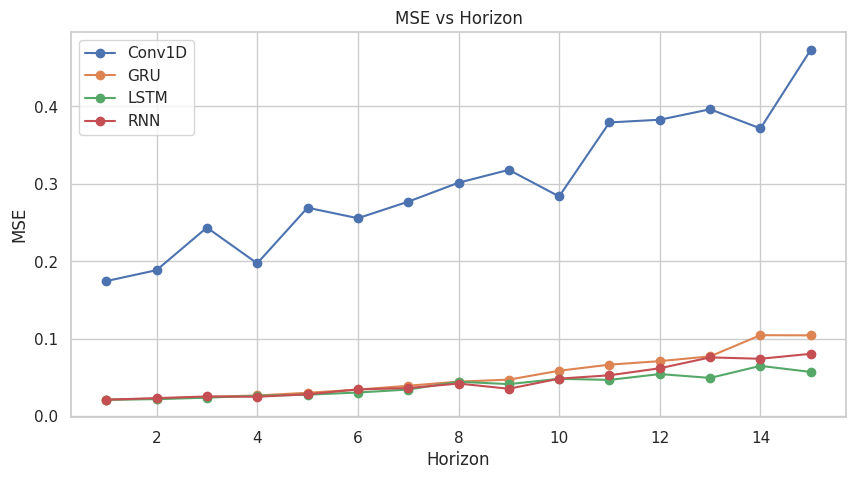

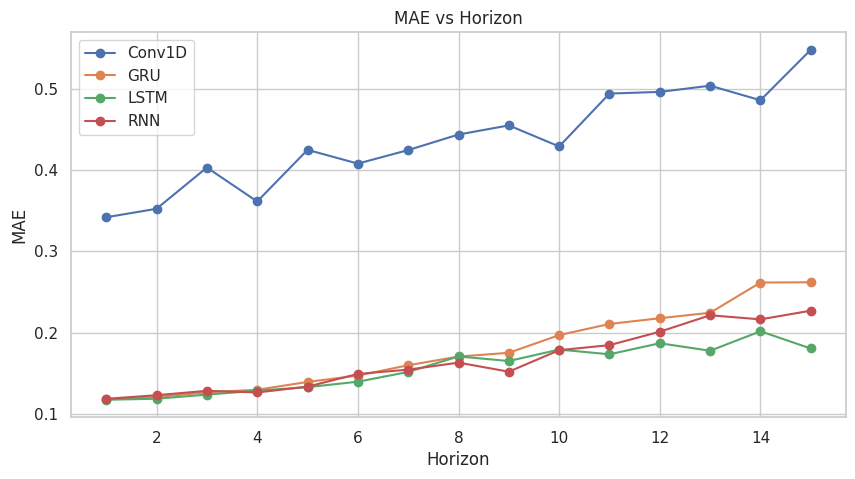

,mse,mae,train_time_s,train_epochs
model,,,,
Conv1D,0.300914,0.438035,8.326707,25.000000
GRU,0.051820,0.177247,11.307676,25.000000
LSTM,0.039786,0.156390,11.303608,24.466667
RNN,0.044620,0.165039,12.645273,24.533333


,horizon,model,mse,mae,train_epochs,train_time_s
0,1,Conv1D,0.174605,0.341836,25,8.567118
1,1,GRU,0.021488,0.117819,25,10.636495
2,1,LSTM,0.021477,0.117298,25,12.523844
3,1,RNN,0.021568,0.118428,25,17.793581
4,2,Conv1D,0.188722,0.352281,25,11.185184
5,2,GRU,0.022953,0.120605,25,11.526959
6,2,LSTM,0.022246,0.118543,25,11.388348
7,2,RNN,0.023566,0.122883,25,12.290151
8,3,Conv1D,0.243724,0.403002,25,8.278350
9,3,GRU,0.025097,0.126483,25,11.093538


In [53]:
# ------------------------------
# PARTE F: Visualizaciones y tabla resumen
# ------------------------------
import seaborn as sns
sns.set(style="whitegrid")

# Pivot para graficar
pivot_mse = df_res.pivot(index='horizon', columns='model', values='mse')
pivot_mae = df_res.pivot(index='horizon', columns='model', values='mae')

plt.figure(figsize=(10,5))
for col in pivot_mse.columns:
    plt.plot(pivot_mse.index, pivot_mse[col], marker='o', label=col)
plt.title("MSE vs Horizon")
plt.xlabel("Horizon")
plt.ylabel("MSE")
plt.legend()
plt.show()

plt.figure(figsize=(10,5))
for col in pivot_mae.columns:
    plt.plot(pivot_mae.index, pivot_mae[col], marker='o', label=col)
plt.title("MAE vs Horizon")
plt.xlabel("Horizon")
plt.ylabel("MAE")
plt.legend()
plt.show()

# Tabla resumen (media de métricas por modelo)
summary = df_res.groupby('model')[['mse','mae','train_time_s','train_epochs']].mean().round(6)
display(summary)

# Mostrar df_res completo
display(df_res.sort_values(['horizon','model']).reset_index(drop=True))
